# Load data

In [66]:
# Import data
import pandas as pd

df1 = pd.read_csv(r'../results/preprocessed_data/2_0_hyperparametertuning_v1.csv',sep=',')
df2 = pd.read_csv(r'../results/preprocessed_data/2_0_hyperparametertuning_v2.csv',sep=',')
df3 = pd.read_csv(r'../results/preprocessed_data/2_0_hyperparametertuning_v3.csv',sep=',')

df2_1 = pd.read_csv(r'../results/preprocessed_data/2_0_hyperparametertuning_v2_1.csv',sep=',')
df2_2 = pd.read_csv(r'../results/preprocessed_data/2_0_hyperparametertuning_v2_2.csv',sep=',')
df2_3 = pd.read_csv(r'../results/preprocessed_data/2_0_hyperparametertuning_v2_3.csv',sep=',')
df2_4 = pd.read_csv(r'../results/preprocessed_data/2_0_hyperparametertuning_v2_4.csv',sep=',')



df = pd.concat([df1, df2, df3, df2_1, df2_2, df2_3, df2_4], axis=0)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# df.to_csv(r'/home/hbt/jchr_data/jchr_racial_diff/results/preprocessed_data/hyperparametertuning_all.csv', index=False)


In [67]:
# Remove values
# df = df.drop(df[df['learning_rate'] != 0.001].index)
# df = df.drop(df[df['decay_rate'] != 0.95].index)
# df = df.drop(df[df['dropout_rates'] != 0.1].index)
# df = df.drop(df[df['batch_size'] == 256].index)
# df = df.drop(df[df['batch_size'] == 2048].index)

In [68]:

best_combination = df.loc[df['val_rmse'].idxmin()]

best_combination

# df.learning_rate.unique()

lay1_neurons                 64
lay2_neurons                 64
activation_function        relu
dropout_rates              0.05
batch_size                 1024
learning_rate              0.01
decay_rate                 0.95
val_rmse               2.075928
test_rmse              2.132637
Name: 3571, dtype: object

# Plots

## Plot val_rmse
All results were very close to each other and so the results were looked at a bit further. It was observed in (Figure A.2) that most RMSE values were between 2 and 3 mmol/L

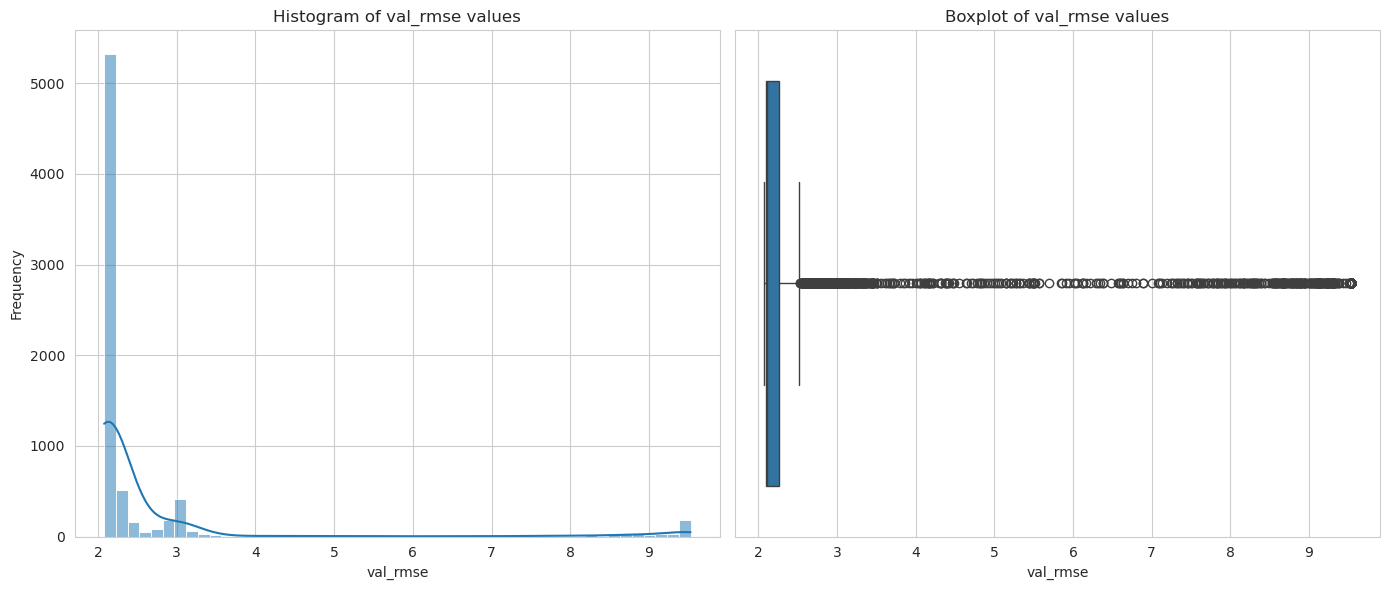

In [69]:
# Statistical summary of val_rmse values
val_rmse_summary = df['val_rmse'].describe()

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Histogram of val_rmse values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['val_rmse'], bins=50, kde=True)
plt.title('Histogram of val_rmse values')
plt.xlabel('val_rmse')
plt.ylabel('Frequency')

# Boxplot of val_rmse values
plt.subplot(1, 2, 2)
sns.boxplot(x=df['val_rmse'])
plt.title('Boxplot of val_rmse values')
plt.xlabel('val_rmse')

plt.tight_layout()
plt.show()

In [70]:
## Correlation with val_rmse
df_temp = df.copy()
df_temp.drop(columns='activation_function' ,inplace=True)
correlation_matrix = df_temp.corr()['val_rmse'].sort_values()
# Learning rate and decay rate is the most correlated
# Visualization setup

## Scatter plot for learning_rate vs val_rmse

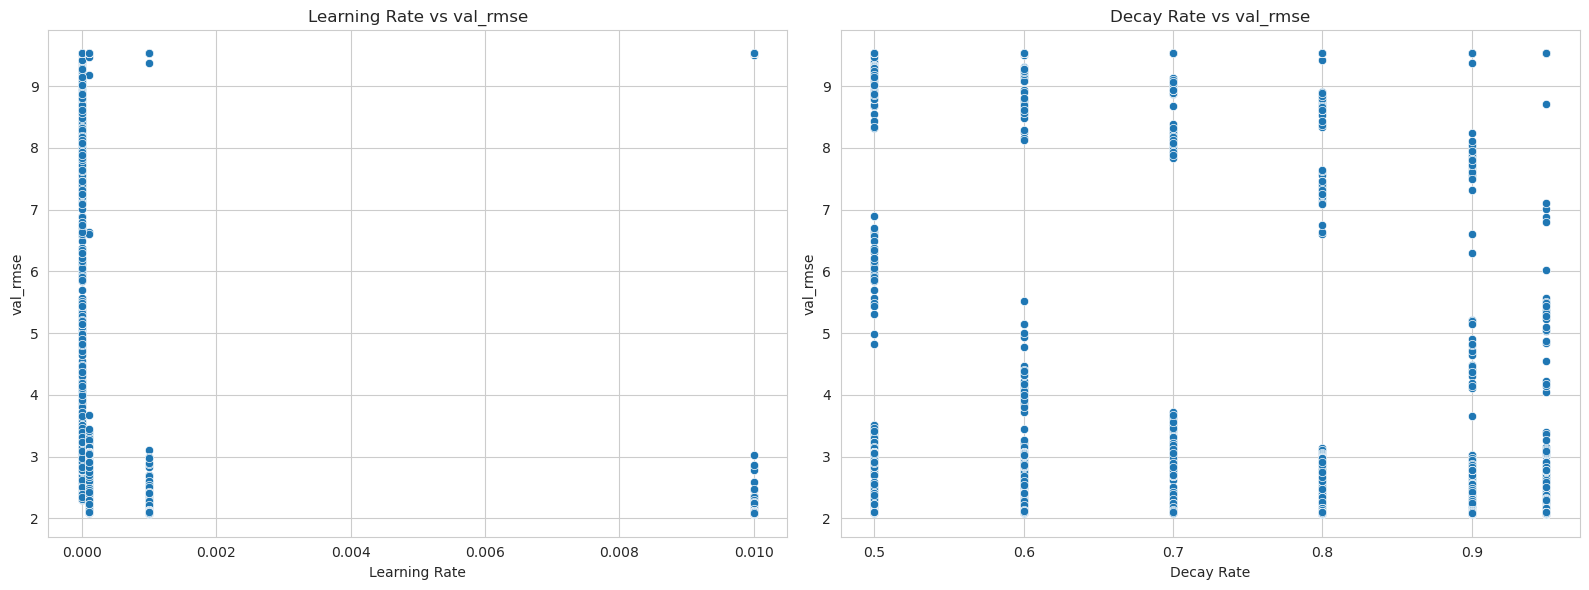

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))



sns.scatterplot(data=df, x='learning_rate', y='val_rmse', ax=ax[0])
ax[0].set_title('Learning Rate vs val_rmse')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('val_rmse')

# Scatter plot for decay_rate vs val_rmse
sns.scatterplot(data=df, x='decay_rate', y='val_rmse', ax=ax[1])
ax[1].set_title('Decay Rate vs val_rmse')
ax[1].set_xlabel('Decay Rate')
ax[1].set_ylabel('val_rmse')

plt.tight_layout()
plt.show()


## Visualization setup for numeric hyperparameters

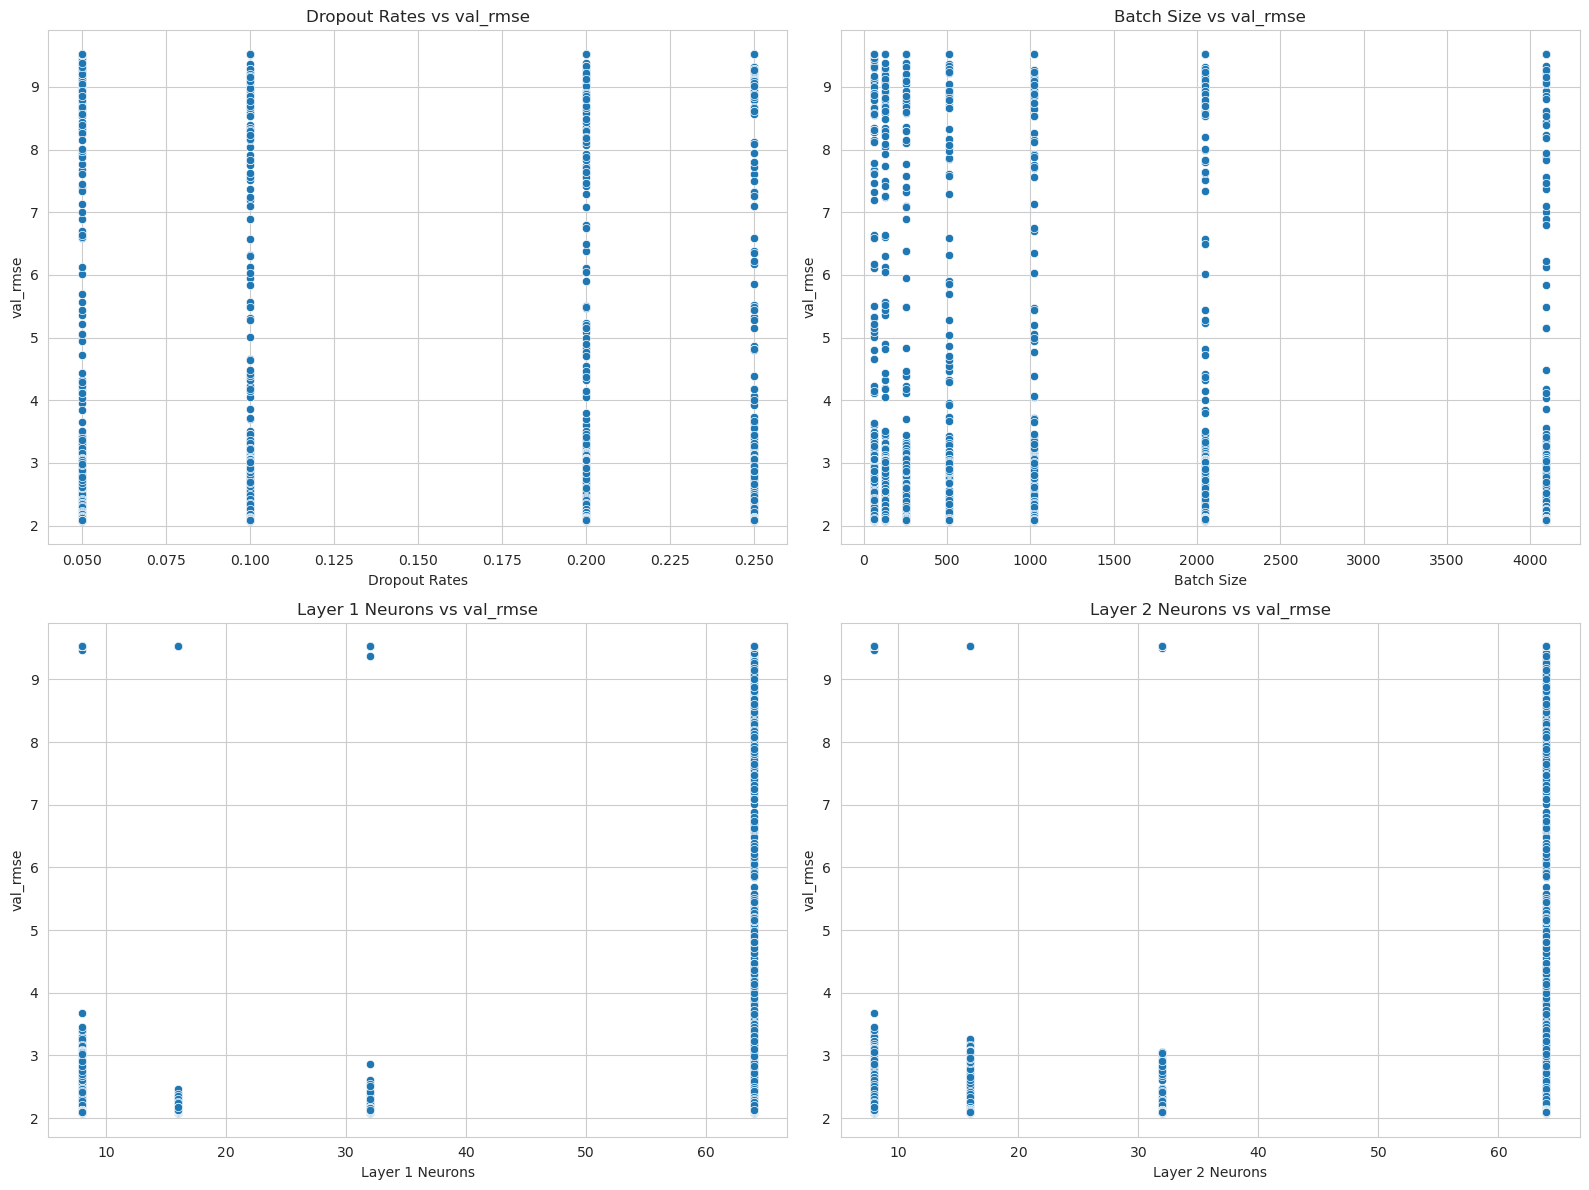

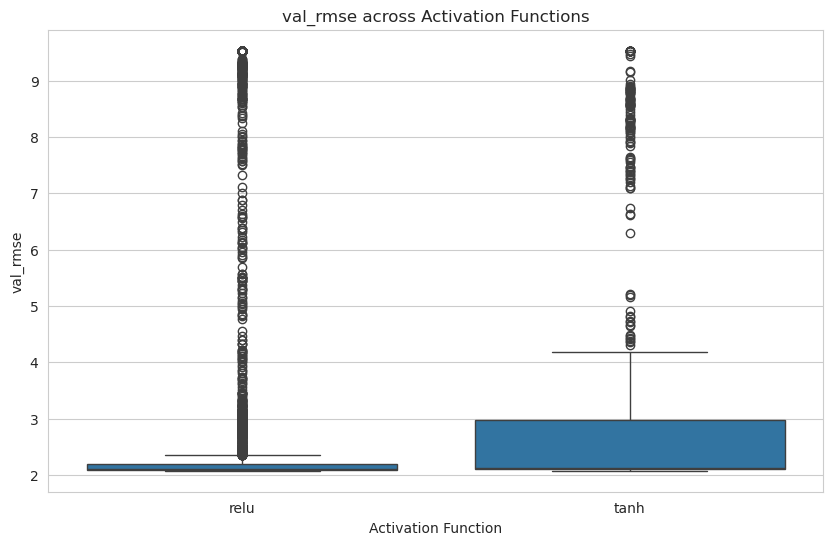

In [72]:

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot for dropout_rates vs val_rmse
sns.scatterplot(data=df, x='dropout_rates', y='val_rmse', ax=axs[0, 0])
axs[0, 0].set_title('Dropout Rates vs val_rmse')
axs[0, 0].set_xlabel('Dropout Rates')
axs[0, 0].set_ylabel('val_rmse')

# Scatter plot for batch_size vs val_rmse
sns.scatterplot(data=df, x='batch_size', y='val_rmse', ax=axs[0, 1])
axs[0, 1].set_title('Batch Size vs val_rmse')
axs[0, 1].set_xlabel('Batch Size')
axs[0, 1].set_ylabel('val_rmse')

# Scatter plot for lay1_neurons vs val_rmse
sns.scatterplot(data=df, x='lay1_neurons', y='val_rmse', ax=axs[1, 0])
axs[1, 0].set_title('Layer 1 Neurons vs val_rmse')
axs[1, 0].set_xlabel('Layer 1 Neurons')
axs[1, 0].set_ylabel('val_rmse')

# Scatter plot for lay2_neurons vs val_rmse
sns.scatterplot(data=df, x='lay2_neurons', y='val_rmse', ax=axs[1, 1])
axs[1, 1].set_title('Layer 2 Neurons vs val_rmse')
axs[1, 1].set_xlabel('Layer 2 Neurons')
axs[1, 1].set_ylabel('val_rmse')

plt.tight_layout()
plt.show()

# Boxplot for activation_function categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='activation_function', y='val_rmse', data=df)
plt.title('val_rmse across Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('val_rmse')
plt.show()


In [73]:
val_rmse_stats_by_activation = df.groupby('activation_function')['val_rmse'].describe()
val_rmse_stats_by_activation


,count,mean,std,min,25%,50%,75%,max
activation_function,,,,,,,,
relu,5618.0,2.615848,1.624545,2.075928,2.092139,2.108399,2.198043,9.529413
tanh,1731.0,2.799656,1.587214,2.076085,2.103858,2.123453,2.971775,9.529413


## Heatmaps
To see if best combination is the best

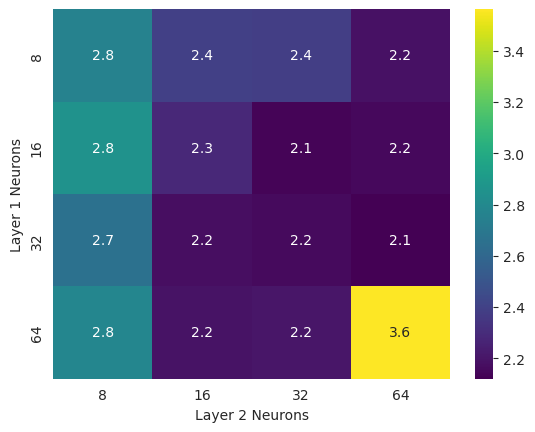

In [74]:
heatmap_data_l1_l2 = df.pivot_table(index='lay1_neurons', columns='lay2_neurons', values='val_rmse', aggfunc='mean')
sns.heatmap(heatmap_data_l1_l2, annot=True, cmap='viridis')
plt.xlabel('Layer 2 Neurons')
plt.ylabel('Layer 1 Neurons')
plt.show()

 It was decided to have 8 neurons in layer 1 and 64 in the second layer.

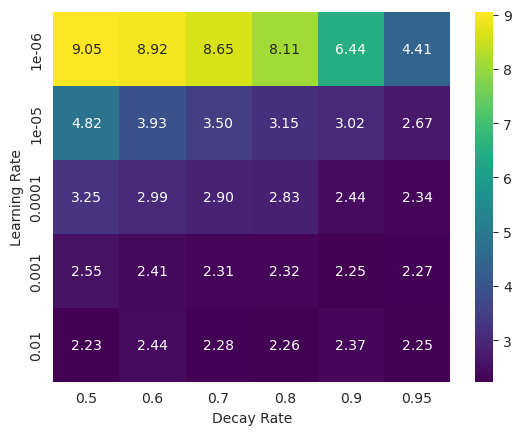

In [75]:
# Recalculate the average 'val_rmse' for combinations of 'learning_rate' and binned 'decay_rate' without binning 'learning_rate'
# Remove the previous binning for 'learning_rate'
df['decay_rate_bin'] = pd.cut(df['decay_rate'], 4)  # Ensure decay_rate is still binned for clarity

# Use the actual 'learning_rate' values directly
# heatmap_data = df.groupby(['learning_rate', 'decay_rate_bin'])['val_rmse'].mean().unstack()
heatmap_data = df.pivot_table(index='learning_rate', columns='decay_rate', values='val_rmse', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.xlabel('Decay Rate')
plt.ylabel('Learning Rate')
plt.show()


Learning rate should be: 0.01 or 0.001 and learning rates smaller will be removed

In [76]:
df = df.drop(df[df['learning_rate'] < 0.0001].index)

### Decay rate

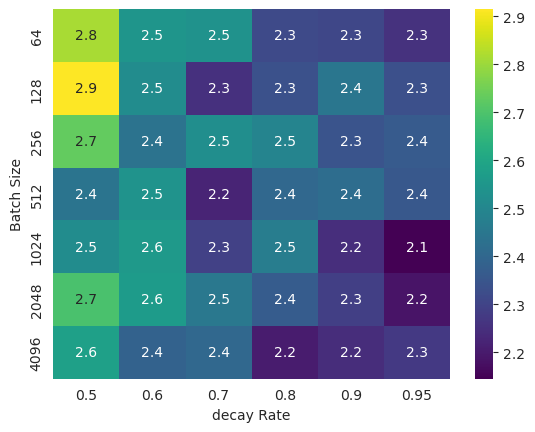

In [77]:
heatmap_data_lr_bs = df.pivot_table(index='batch_size', columns='decay_rate', values='val_rmse', aggfunc='mean')
sns.heatmap(heatmap_data_lr_bs, annot=True, cmap='viridis')
plt.xlabel('decay Rate')
plt.ylabel('Batch Size')
plt.show()

Decay rate of 0.95 is chosen.

In [78]:
df = df.drop(df[df['decay_rate'] != 0.95].index)

### Learning rate

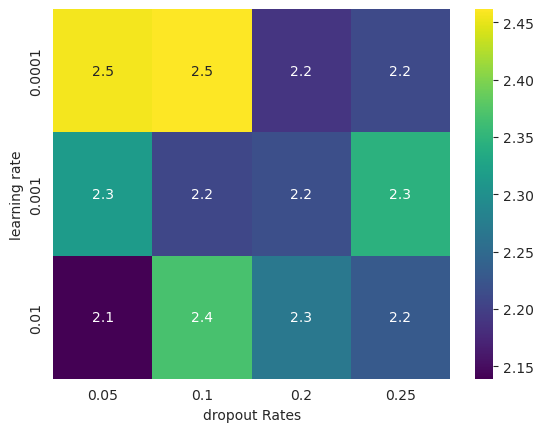

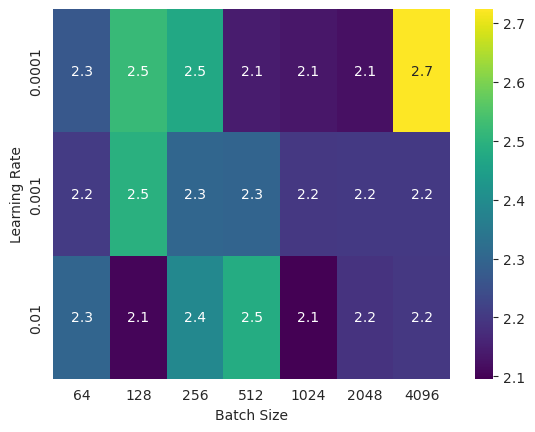

In [79]:
heatmap_data_lr_bs = df.pivot_table(index='learning_rate', columns='dropout_rates', values='val_rmse', aggfunc='mean')
sns.heatmap(heatmap_data_lr_bs, annot=True, cmap='viridis')
plt.xlabel('dropout Rates')
plt.ylabel('learning rate')
plt.show()

heatmap_data_lr_bs = df.pivot_table(index='learning_rate', columns='batch_size', values='val_rmse', aggfunc='mean')
sns.heatmap(heatmap_data_lr_bs, annot=True, cmap='viridis')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.show()

A learning rate of 0.001 was chosen

In [80]:
# df = df.drop(df[df['learning_rate'] != 0.001].index)

### Neurons

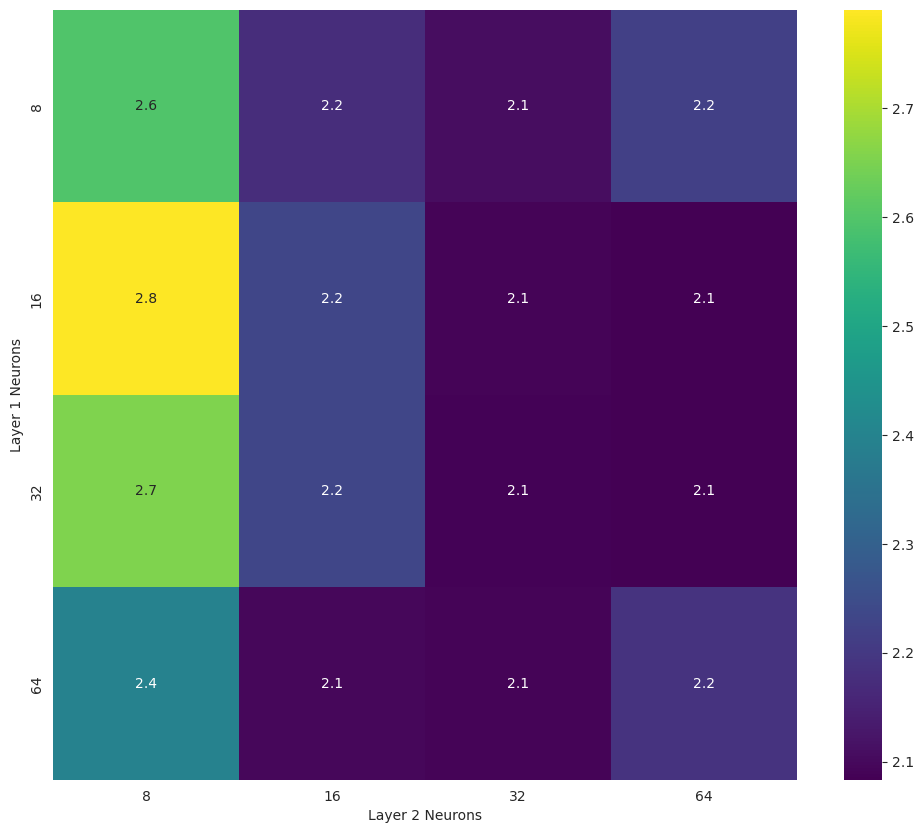

In [81]:
heatmap_data_l1_l2 = df.pivot_table(index='lay1_neurons', columns='lay2_neurons', values='val_rmse', aggfunc='mean')
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data_l1_l2, annot=True, cmap='viridis')
plt.xlabel('Layer 2 Neurons')
plt.ylabel('Layer 1 Neurons')
plt.show()

It was decided to have 8 neurons in layer 1 and 64 in the second layer.

In [82]:
# Remove values
# df = df.drop(df[df['learning_rate'] != 0.001].index)

# df = df.drop(df[df['dropout_rates'] != 0.1].index)
# df = df.drop(df[df['batch_size'] == 256].index)
# df = df.drop(df[df['batch_size'] == 2048].index)

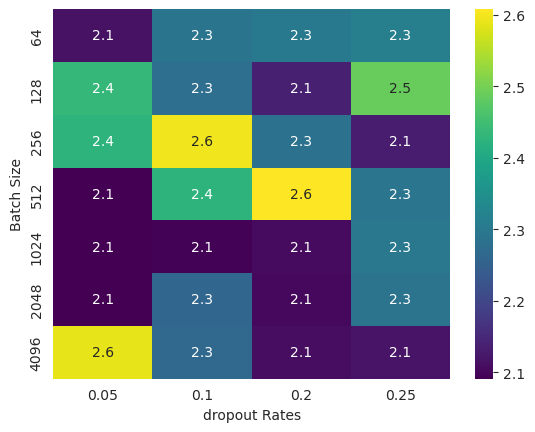

In [83]:
# Generate heatmap for lay1_neurons and lay2_neurons without binning





# Next, we'll prepare the heatmap for learning_rate and batch_size.
heatmap_data_lr_bs = df.pivot_table(index='batch_size', columns='dropout_rates', values='val_rmse', aggfunc='mean')

# Plot the heatmap for learning_rate and batch_size
# plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data_lr_bs, annot=True, cmap='viridis')
# plt.title('Heatmap of Average val_rmse for Learning Rate and Batch Size')
plt.xlabel('dropout Rates')
plt.ylabel('Batch Size')
plt.show()



In [84]:
best_combination = df.loc[df['val_rmse'].idxmin()]

best_combination

lay1_neurons                      64
lay2_neurons                      64
activation_function             relu
dropout_rates                   0.05
batch_size                      1024
learning_rate                   0.01
decay_rate                      0.95
val_rmse                    2.075928
test_rmse                   2.132637
decay_rate_bin         (0.837, 0.95]
Name: 3571, dtype: object

# Split Hyperparamter Combinations to Check for

In [85]:
import pandas as pd
import itertools

# Define your parameters
lay1_neurons = [64, 32, 16, 8]
lay2_neurons = [64, 32, 16, 8]
activation_function = ['relu']
dropout_rates = [0.05, 0.1, 0.2, 0.25]
batch_size = [64, 128, 256, 512, 1024, 2048, 4096]
learning_rate = [0.01, 0.001]
decay_rate = [0.6, 0.7, 0.8, 0.9, 0.95]

# Create all possible combinations of hyperparameters
params = list(itertools.product(lay1_neurons,
                                lay2_neurons,
                                activation_function,
                                dropout_rates,
                                batch_size,
                                learning_rate,
                                decay_rate))

# Convert params to DataFrame
params_df = pd.DataFrame(params, columns=['lay1_neurons', 'lay2_neurons', 'activation_function',
                                          'dropout_rates', 'batch_size', 'learning_rate', 'decay_rate'])

# Find rows in params_df not in df_results
# Assuming df_results has the same column names for the parameters
remaining_params_df = pd.merge(params_df, df.drop(columns=['val_rmse', 'test_rmse']), 
                               on=['lay1_neurons', 'lay2_neurons', 'activation_function', 
                                   'dropout_rates', 'batch_size', 'learning_rate', 'decay_rate'], 
                               how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

# Convert back to list of tuples if necessary
remaining_params = list(remaining_params_df.to_records(index=False))
part_size = len(remaining_params)//4

list1 = remaining_params[:part_size]
list2 = remaining_params[part_size:2*part_size]
list3 = remaining_params[2*part_size:3*part_size]
list4 = remaining_params[3*part_size:]
# remaining_params_df.to_csv(r'../results/preprocessed_data/2_1_remaining_params_v1.csv', index=False)